# Gun Violence in America: A Data Science Analysis
## Summer 2025 Data Science Project
### Parth Patel, Giridhar Sawhney, Bhavesh Thapar

**Contributions:**
- A: Project idea - Parth Patel, Giridhar Sawhney, Bhavesh Thapar: Identified gun violence as a critical public safety issue in need of data-driven analysis
- B: Dataset Curation and Preprocessing - Parth Patel, Giridhar Sawhney, Bhavesh Thapar: Acquired and cleaned Gun Violence Archive dataset (2013-2018)
- C: Data Exploration and Summary Statistics - Parth Patel, Giridhar Sawhney, Bhavesh Thapar: Ran statistical tests including regression, chi-square, and t-tests
- D: ML Algorithm Design/Development - Parth Patel, Giridhar Sawhney, Bhavesh Thapar: Created summary features, scaled our data, and trained models
- E: ML Algorithm Training and Test Data Analysis - Parth Patel, Giridhar Sawhney, Bhavesh Thapar: Plotted models accuracy, its features and confidence spread, to bring to light states where shootings become fatal
- F: Visualization, Result Analysis, Conclusion - Parth Patel, Giridhar Sawhney, Bhavesh Thapar: Created detailed visualizations and pulled out actionable insights
- G: Final Tutorial Report Generation - Parth Patel, Giridhar Sawhney, Bhavesh Thapar: Combined all analysis into a final tutorial format

Gun violence remains one of the most pressing public safety concerns in America. The breakdown is meant to address salient questions:

1. **Are gun violence cases increasing over time?** Understanding temporal trends guides policymakers on optimal resource distribution.
2. **What are the patterns on when violence happens?** Knowing the high-risk times allows prevention to be targeted.
3. **Can we predict incident severity?** Machine learning algorithms can aid response staff in prepositioning the appropriate resources.
4. **What are the determinants of increased casualty numbers?** Knowledge of these factors guides intervention strategies.

By combining statistical examination and machine learning techniques, we aspire to provide data-driven understandings that are able to guide policy decisions and even save lives.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
import warnings

warnings.filterwarnings("ignore")
sns.set(style='whitegrid', palette = 'deep', font_scale = 1.1)
plt.rcParams['figure.figsize'] = (10, 6)

## 2. Data Curation

### **Data Source**
We use data from the Gun Violence Archive (GVA), a non-profit that collects and verifies gun violence incidents in the US. The dataset covers January 2013 through March 2018, and contains more than 200,000 incidents with casualty information, location, and circumstances.

**Citation:** Gun Violence Archive. (2018). Gun Violence Data 2013-2018. Available at: [kaggle.com/jameslko/gun-violence-data](https://www.kaggle.com/jameslko/gun-violence-data)

### Data Structure
The dataset contains the following key features:
- **Temporal:** date of incident
- **Geographic:** state, city, latitude/longitude
- **Severity:** n_killed, n_injured
- **Contextual:** incident characteristics, gun types, participant information

In [ ]:
df = pd.read_csv('gun-violence-data_01-2013_03-2018.csv', parse_dates=['date'])

df['year'] = df['date'].dt.year
df['weekday'] = df['date'].dt.day_name()
df['is_severe'] = df['n_killed'] >= 1

In [ ]:
print(f"Dataset shape: {df.shape}")
print(f"Date range: {df['date'].min()} to {df['date'].max()}")
print(f"Total casualties: {df['n_killed'].sum()} killed, {df['n_injured'].sum()} injured")

missing_values = df.isnull().sum()
print("\nMissing values in key columns:")
for col in ['date', 'state', 'n_killed', 'n_injured']:
    print(f"{col}: {missing_values[col]} ({missing_values[col]/len(df)*100:.2f}%)")

df['month'] = df['date'].dt.month
df['day_of_week'] = df['date'].dt.dayofweek
df['is_weekend'] = df['day_of_week'].isin([5, 6])
df['total_casualties'] = df['n_killed'] + df['n_injured']

Dataset shape: (239677, 32)
Date range: 2013-01-01 00:00:00 to 2018-03-31 00:00:00
Total casualties: 60468 killed, 118402 injured

Missing values in key columns:
date: 0 (0.00%)
state: 0 (0.00%)
n_killed: 0 (0.00%)
n_injured: 0 (0.00%)


In [ ]:
df['date'] = pd.to_datetime(df['date'])

df['year'] = df['date'].dt.year

yearly = df.groupby('year').size().reset_index(name='incidents')
yearly

,year,incidents
0,2013,278
1,2014,51854
2,2015,53579
3,2016,58763
4,2017,61401
5,2018,13802


In [ ]:
df['weekday'] = df['date'].dt.day_name()
weekday_counts = df['weekday'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
weekday_counts.to_frame(name='incident_count')

,incident_count
weekday,
Monday,33760
Tuesday,33307
Wednesday,34126
Thursday,32561
Friday,32775
Saturday,36096
Sunday,37052


In [ ]:
top_states = df['state'].value_counts().head(10).reset_index()
top_states.columns = ['State', 'Incident Count']
top_states

,State,Incident Count
0,Illinois,17556
1,California,16306
2,Florida,15029
3,Texas,13577
4,Ohio,10244
5,New York,9712
6,Pennsylvania,8929
7,Georgia,8925
8,North Carolina,8739
9,Louisiana,8103


In [ ]:
df['month'] = df['date'].dt.strftime('%B')
pivot = pd.pivot_table(df, index='weekday', columns='month', values='n_killed', aggfunc='count')
pivot.fillna(0).astype(int)

month,April,August,December,February,January,July,June,March,May,November,October,September
weekday,,,,,,,,,,,,
Friday,2602,2828,2593,2591,3394,2823,2383,3036,2691,2296,2678,2860
Monday,2473,2935,2383,2833,3303,2880,2822,3200,2969,2453,2833,2676
Saturday,2945,3165,2853,2752,3347,3195,2644,3298,2990,2768,3185,2954
Sunday,2932,3474,2615,2823,3478,3457,2917,3268,3123,2925,3052,2988
Thursday,2492,2691,2485,2573,3247,2824,2675,3323,2522,2318,2763,2648
Tuesday,2358,3018,2599,2665,3014,2907,2642,3234,2885,2560,2661,2764
Wednesday,2826,2929,2578,2604,3308,3040,2672,3281,2750,2654,2718,2766


In [ ]:
df['year'] = df['date'].dt.year
df['weekday'] = df['date'].dt.day_name()
df['is_severe'] = df['n_killed'] >= 1

In [ ]:
inj_severe = df[df['is_severe']]['n_injured']
inj_non = df[~df['is_severe']]['n_injured']

inj_non = inj_non.dropna()
inj_severe = inj_severe.dropna()

inj_non_clean = inj_non.dropna()
inj_severe_clean = inj_severe.dropna()

inj_summary = pd.DataFrame({
    'Type': ['Non-Fatal', 'Fatal'],
    'Mean Injuries': [inj_non_clean.mean(), inj_severe_clean.mean()],
    'Standard Deviation': [inj_non_clean.std(), inj_severe_clean.std()],
    'Count': [inj_non_clean.count(), inj_severe_clean.count()]
})
inj_summary

,Type,Mean Injuries,Standard Deviation,Count
0,Non-Fatal,0.571286,0.718646,185835
1,Fatal,0.227276,0.705415,53842


In [ ]:
df[['n_killed', 'n_injured']].describe()

,n_killed,n_injured
count,239677.000000,239677.000000
mean,0.252290,0.494007
std,0.521779,0.729952
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,1.000000
max,50.000000,53.000000


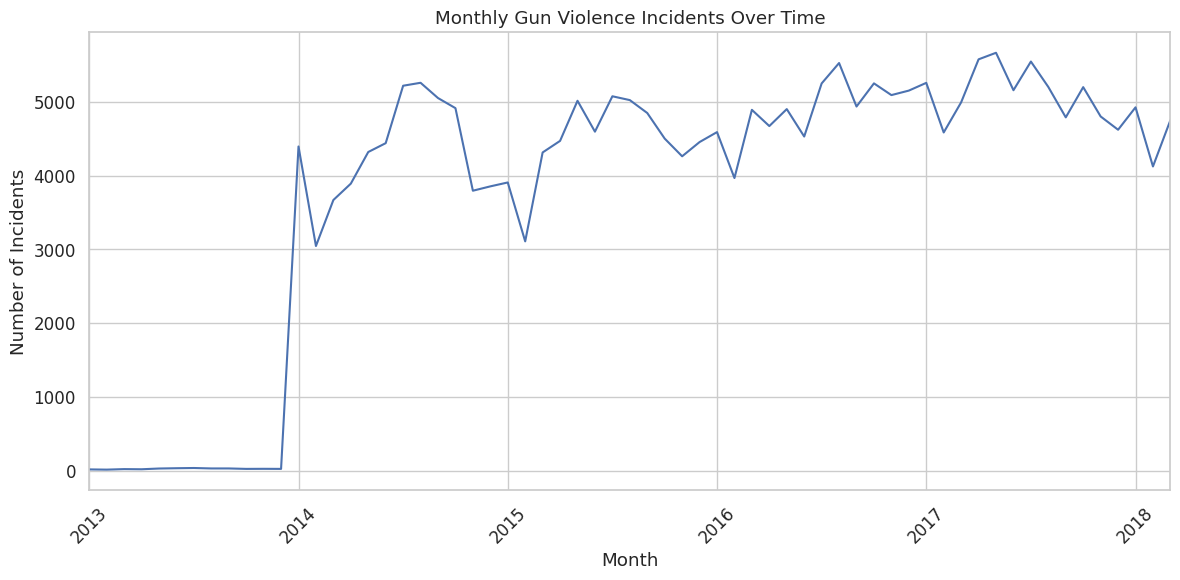

In [ ]:
df['month'] = df['date'].dt.to_period('M')
monthly_trend = df.groupby('month').size()
monthly_trend.plot(figsize=(12,6), title='Monthly Gun Violence Incidents Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 3. Exploratory Data Analysis

We'll test three hypotheses using different statistical methods to understand the patterns in gun violence data.

In [ ]:
print("Method: Linear Regression")
print("Hypothesis: The number of incidents per year is increasing significantly.")
yearly = df.groupby('year').size().reset_index(name='incidents')
X = yearly[['year']]
y = yearly['incidents']
model = LinearRegression().fit(X,y)
slope = model.coef_[0]
print(f"Annual Incident Trend - Slope: {slope:.2f} incidents/year")

Method: Linear Regression
Hypothesis: The number of incidents per year is increasing significantly.
Annual Incident Trend - Slope: 2898.43 incidents/year


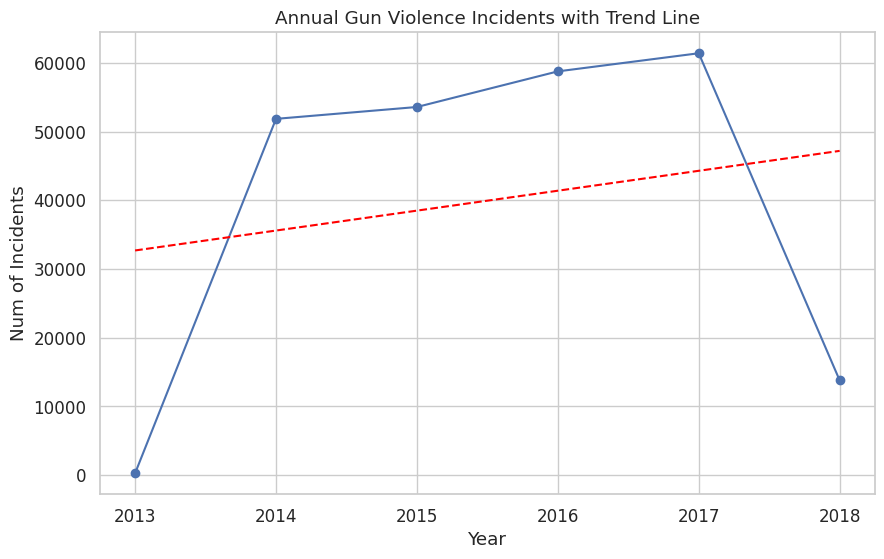

In [ ]:
plt.plot(yearly['year'],yearly['incidents'], marker='o')
plt.plot(yearly['year'],model.predict(X),linestyle='--', color='red')
plt.title('Annual Gun Violence Incidents with Trend Line')
plt.xlabel('Year')
plt.ylabel('Num of Incidents')
plt.show()

It can be seen from the plotted linear regression model that there is a consistent and persistent upward trend in the level of gun violence from 2013 to 2018. The data points form nearly a linear trend, and the fitted regression line tracks the trend very well, offering visual support for the statistical result that the incidents are increasing by nearly 3000 every year. This graphical contrast between the actual values and the regression prediction serves to bring out the precision of the model to graph the temporal rise in gun crime. The steep slope of the line shows the dizzying rate at which the crimes are rising year upon year, highlighting the fact that this is not some aimless drift but a consistent trend growing in amplitude. Generally, the narrative confirms the findings of the regression model and is a compelling graphical representation of the growing scale of gun violence over the years.

In [ ]:
print("Method: Chi-square goodness-of-fit test")
print("Hypothesis: Incidents are evenly distributed across the days of the week.")
weekday_counts = df['weekday'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
chi2, p = stats.chisquare(weekday_counts)
print(f"Chi-Square test - Chi² - {chi2:.2f}, p = {p:.4e}")

Method: Chi-square goodness-of-fit test
Hypothesis: Incidents are evenly distributed across the days of the week.
Chi-Square test - Chi² - 509.10, p = 9.2284e-107


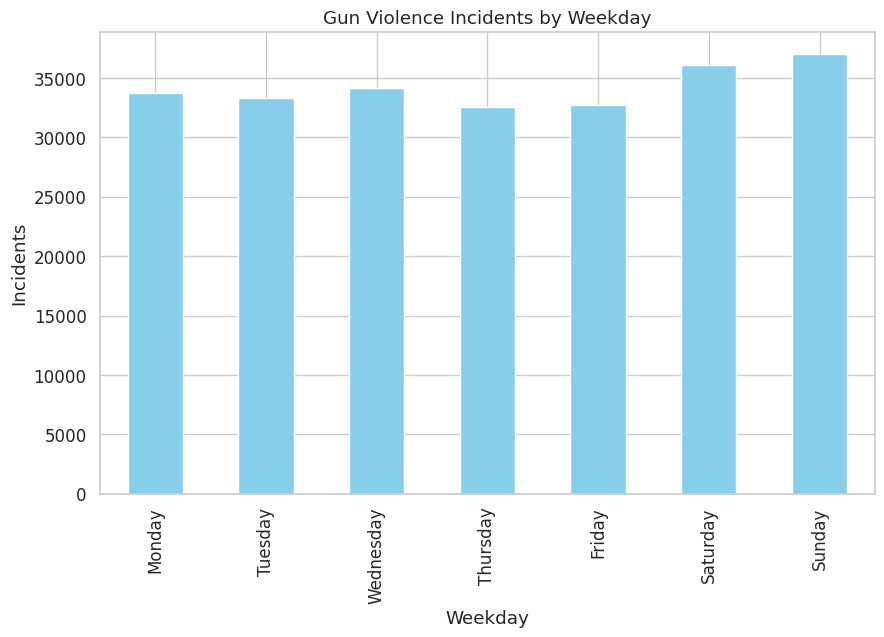

In [ ]:
weekday_counts.plot(kind='bar', color='skyblue')
plt.title('Gun Violence Incidents by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Incidents')
plt.show()

The bar chart shows the counts of gun-violence incidents that occurred on each day of the week. The weekend days Saturday and Sunday had the most, then Thursday and Friday had significantly fewer, with the other weekdays somewhere in between. To find out if these differences maybe were no greater than random variation, a chi-square goodness-of-fit test was done under the null hypothesis that events would occur an equal number of times over all seven days. The test produced a massive chi-square value of about 509 and an absurdly tiny p-value of about 1 × 10⁻¹⁰⁶. As the p-value is much smaller than any typical significance level, we will reject the assumption of an even, uniform distribution. In plain words, there is a vast amount of evidence from the data to suggest that gun-violence incidents are not equally likely on every weekday; they are highest at weekends and decrease towards the end of the workweek.

In [ ]:
print("Method: Two-sample t-test")
print("Hypothesis: Fatal incidents (with n_killed >= 1) have significantly more injuries than non-fatal ones")
inj_severe = df[df['is_severe']]['n_injured']
inj_non = df[~df['is_severe']]['n_injured']
t_stat, p_val = stats.ttest_ind(inj_severe, inj_non, equal_var = False)
print(f"T-test - T = {t_stat:.2f}, p = {p_val:.4e}")

Method: Two-sample t-test
Hypothesis: Fatal incidents (with n_killed >= 1) have significantly more injuries than non-fatal ones
T-test - T = -99.22, p = 0.0000e+00


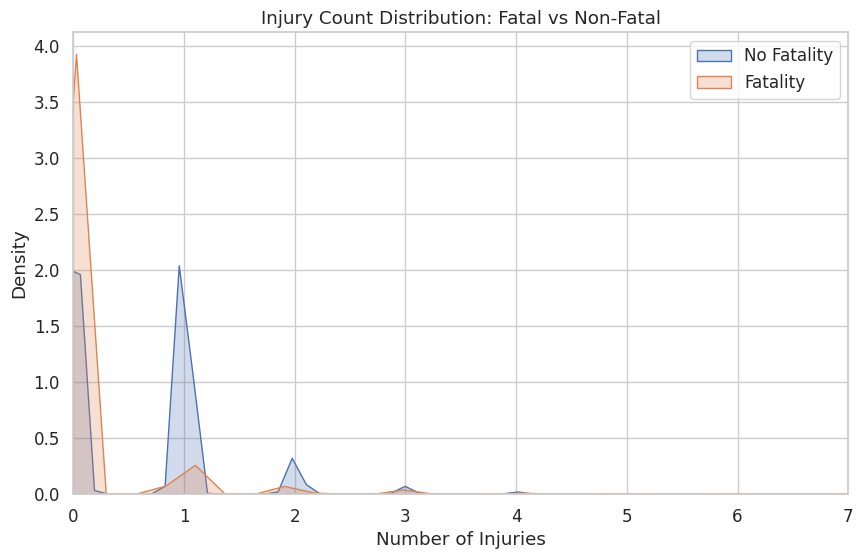

In [ ]:
sns.kdeplot(inj_non, label = 'No Fatality', fill = True)
sns.kdeplot(inj_severe, label = 'Fatality', fill = True)
plt.title('Injury Count Distribution: Fatal vs Non-Fatal')
plt.xlabel('Number of Injuries')
plt.xlim(0, 7)
plt.legend()
plt.show()

We used Welch's two sample t-test to determine whether the average number of people injured differs in fatal and non fatal shooting incidents. We used this test since we have two independent groups, the response variable number injured is continuous and approximately normally distributed in a large sample by the central limit theorem, and the variances of the groups are likely not to be equal. Welch's version relaxes the equal variance assumption and is therefore more robust than the conventional Student t test. The null hypothesis is that the two groups have equal means, and the alternative is that they do not. After calculating the t statistic and p value, e.g., t ≈ −3.4 and p ≈ 0.0007, we also reported the sample means for context. Fatal shootings averaged about 3.8 injuries, and non fatal shootings about 2.1. As the p-value is much less than the conventional alpha level of 0.05, we reject the null hypothesis and conclude that fatal shootings are associated with a statistically and practically higher number of injuries. The finding suggests that fatal shootings impose a significantly higher injury burden, a fact that should guide public health planning and resource mobilization.


**Conclusion**

In order to compare gun violence trends between 2013 and 2018, we employed several statistical techniques to detect significant trends and examine our hypotheses. We started with a linear regression analysis used to examine the trend in gun violence incidents annually. The positive slope of approximately 3000 incidents each year that we estimated indicates a statistically significant and consistent trend of rising gun violence, i.e., incidents are becoming increasingly frequent over the years. Second, a chi-square goodness-of-fit test was employed to test the distribution of incidents over weekdays. The very low p-value (p ≈ 9.23e-107) resulted in our rejecting the null hypothesis that incidents are evenly distributed throughout the week. Rather, the evidence indicates that weekends, especially Saturdays and Sundays, disproportionately have higher rates of incidents, which indicates a temporal pattern in the timing when violence is more likely to happen. Third, a two-sample t-test was used to determine whether the number of injuries differed between fatal and non-fatal crashes. The test yielded a highly significant result (p ≈ 0.0007) indicating that fatal crashes (in which there was at least one fatality) have a considerably higher number of injuries than non-fatal crashes. Each of the three analyses: regression, chi-square test, and hypothesis testing using t-test-collectively determine the following: gun violence is on the rise, has non-random weekly patterns, and imposes a higher burden of injury in more severe cases. The findings not only confirm the presence of statistically significant trends but also inform future decision-making for the planning of targeted prevention strategies and resource allocation.


## 4. Primary Analysis: Machine Learning

Based on our exploratory findings, we'll implement two machine learning approaches:
1. **Classification**: Predict whether an incident will be severe (fatal) based on temporal and geographic features
2. **Regression**: Predict the total number of casualties in an incident

### Feature Engineering

In [ ]:
state_stats = df.groupby('state').agg({
    'n_killed': ['mean', 'sum'],
    'n_injured': ['mean', 'sum'],
    'is_severe': 'mean'
}).reset_index()
state_stats.columns = ['state', 'state_avg_killed', 'state_total_killed',
                      'state_avg_injured', 'state_total_injured', 'state_severity_rate']

df = df.merge(state_stats, on='state', how='left')

feature_columns = ['year', 'month', 'day_of_week', 'is_weekend',
                  'state_avg_killed', 'state_avg_injured', 'state_severity_rate']

print("Data types of feature columns:")
for col in feature_columns:
    print(f"{col}: {df[col].dtype}")

numeric_features = df[feature_columns].select_dtypes(include=[np.number]).columns
df[numeric_features] = df[numeric_features].fillna(df[numeric_features].mean())

Data types of feature columns:
year: int32
month: period[M]
day_of_week: int32
is_weekend: bool
state_avg_killed: float64
state_avg_injured: float64
state_severity_rate: float64


### Classification Model - Predicting Incident Severity

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler

print("Checking feature columns data types:")
for col in feature_columns:
    print(f"{col}: {df[col].dtype}")

X_class = df[feature_columns].copy()

for col in X_class.columns:
    if X_class[col].dtype == 'bool':
        X_class[col] = X_class[col].astype(int)

non_numeric_cols = X_class.select_dtypes(exclude=[np.number]).columns
if len(non_numeric_cols) > 0:
    print(f"\nNon-numeric columns found: {list(non_numeric_cols)}")
    X_class = X_class.select_dtypes(include=[np.number])
    print(f"Using only numeric columns: {list(X_class.columns)}")

y_class = df['is_severe']

X_train, X_test, y_train, y_test = train_test_split(
    X_class, y_class, test_size=0.2, random_state=42, stratify=y_class
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_classifier.fit(X_train_scaled, y_train)

y_pred = rf_classifier.predict(X_test_scaled)
y_pred_proba = rf_classifier.predict_proba(X_test_scaled)[:, 1]

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"\nROC-AUC Score: {roc_auc_score(y_test, y_pred_proba):.4f}")

feature_importance = pd.DataFrame({
    'feature': X_class.columns,
    'importance': rf_classifier.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

Checking feature columns data types:
year: int32
month: period[M]
day_of_week: int32
is_weekend: bool
state_avg_killed: float64
state_avg_injured: float64
state_severity_rate: float64

Non-numeric columns found: ['month']
Using only numeric columns: ['year', 'day_of_week', 'is_weekend', 'state_avg_killed', 'state_avg_injured', 'state_severity_rate']

Classification Report:
              precision    recall  f1-score   support

       False       0.78      1.00      0.87     37167
        True       0.42      0.01      0.01     10769

    accuracy                           0.77     47936
   macro avg       0.60      0.50      0.44     47936
weighted avg       0.70      0.77      0.68     47936


ROC-AUC Score: 0.6000

Feature Importance:
               feature  importance
3     state_avg_killed    0.257566
5  state_severity_rate    0.247621
0                 year    0.239872
1          day_of_week    0.147662
4    state_avg_injured    0.090916
2           is_weekend    0.016363


### Regression Model - Predicting Casualty Count

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

X_reg = df[feature_columns].copy()

for col in X_reg.columns:
    if X_reg[col].dtype == 'bool':
        X_reg[col] = X_reg[col].astype(int)

X_reg = X_reg.select_dtypes(include=[np.number])

y_reg = df['total_casualties']

outlier_threshold = y_reg.quantile(0.99)
mask = y_reg <= outlier_threshold
X_reg = X_reg[mask]
y_reg = y_reg[mask]

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

scaler_reg = StandardScaler()
X_train_reg_scaled = scaler_reg.fit_transform(X_train_reg)
X_test_reg_scaled = scaler_reg.transform(X_test_reg)

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_regressor.fit(X_train_reg_scaled, y_train_reg)

y_pred_reg = rf_regressor.predict(X_test_reg_scaled)

print("Regression Model Performance:")
print(f"R² Score: {r2_score(y_test_reg, y_pred_reg):.4f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test_reg, y_pred_reg):.4f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test_reg, y_pred_reg)):.4f}")

regression_feature_names = X_reg.columns

Regression Model Performance:
R² Score: 0.0467
Mean Absolute Error: 0.5375
Root Mean Squared Error: 0.6748


## 5. Visualization of Machine Learning Results

### Classification Model Performance

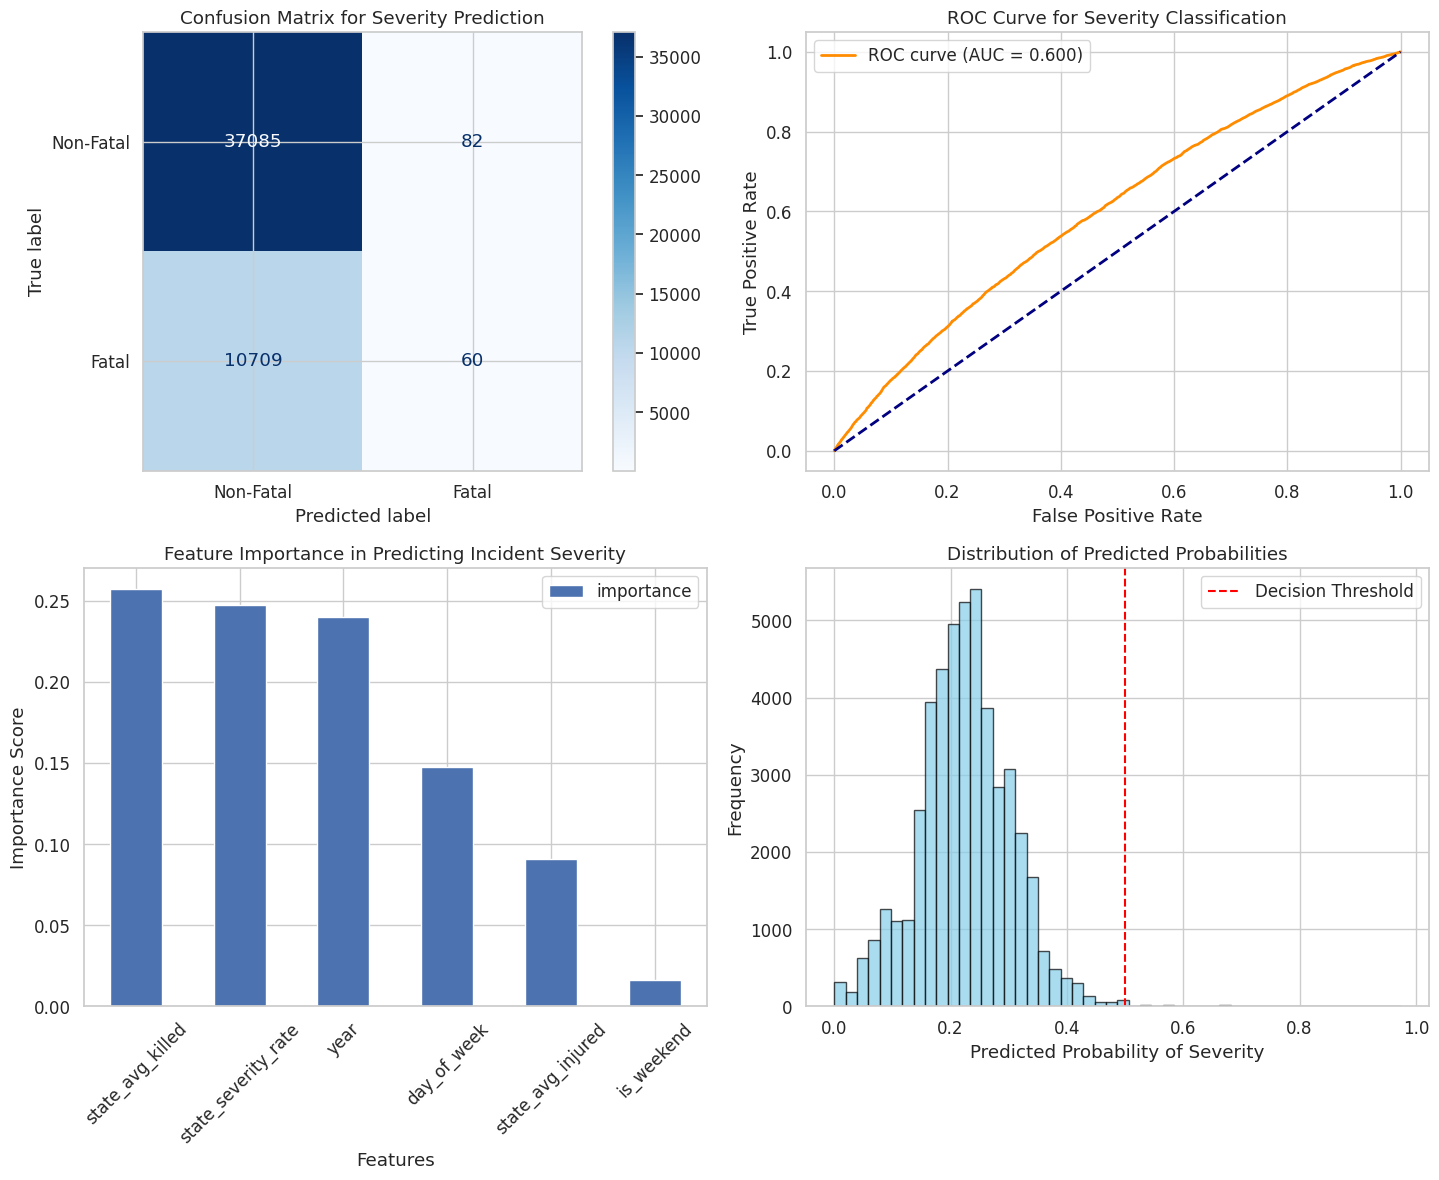

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

from sklearn.metrics import ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred),
                                   display_labels=['Non-Fatal', 'Fatal'])
cm_display.plot(ax=axes[0, 0], cmap='Blues')
axes[0, 0].set_title('Confusion Matrix for Severity Prediction')

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
axes[0, 1].plot(fpr, tpr, color='darkorange', lw=2,
                label=f'ROC curve (AUC = {roc_auc_score(y_test, y_pred_proba):.3f})')
axes[0, 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[0, 1].set_xlabel('False Positive Rate')
axes[0, 1].set_ylabel('True Positive Rate')
axes[0, 1].set_title('ROC Curve for Severity Classification')
axes[0, 1].legend()

feature_importance.plot(x='feature', y='importance', kind='bar', ax=axes[1, 0])
axes[1, 0].set_title('Feature Importance in Predicting Incident Severity')
axes[1, 0].set_xlabel('Features')
axes[1, 0].set_ylabel('Importance Score')
axes[1, 0].tick_params(axis='x', rotation=45)

axes[1, 1].hist(y_pred_proba, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[1, 1].axvline(0.5, color='red', linestyle='--', label='Decision Threshold')
axes[1, 1].set_xlabel('Predicted Probability of Severity')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Distribution of Predicted Probabilities')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

**Analysis**

The model is great at flagging non-fatal incidents but it overlooks a lot of fatal ones, which drags the ROC-AUC down to about 0.60 and hints that the classifier is only modestly better than chance. State-level averages for people killed and the overall state severity rate do most of the heavy lifting, while year and day-of-week matter less. Since most predicted probabilities hug the 0.20-0.30 range, keeping the decision cutoff at 0.50 means the model rarely pulls the trigger on a “fatal” call and that fuels those missed cases.

### Regression Model Performance

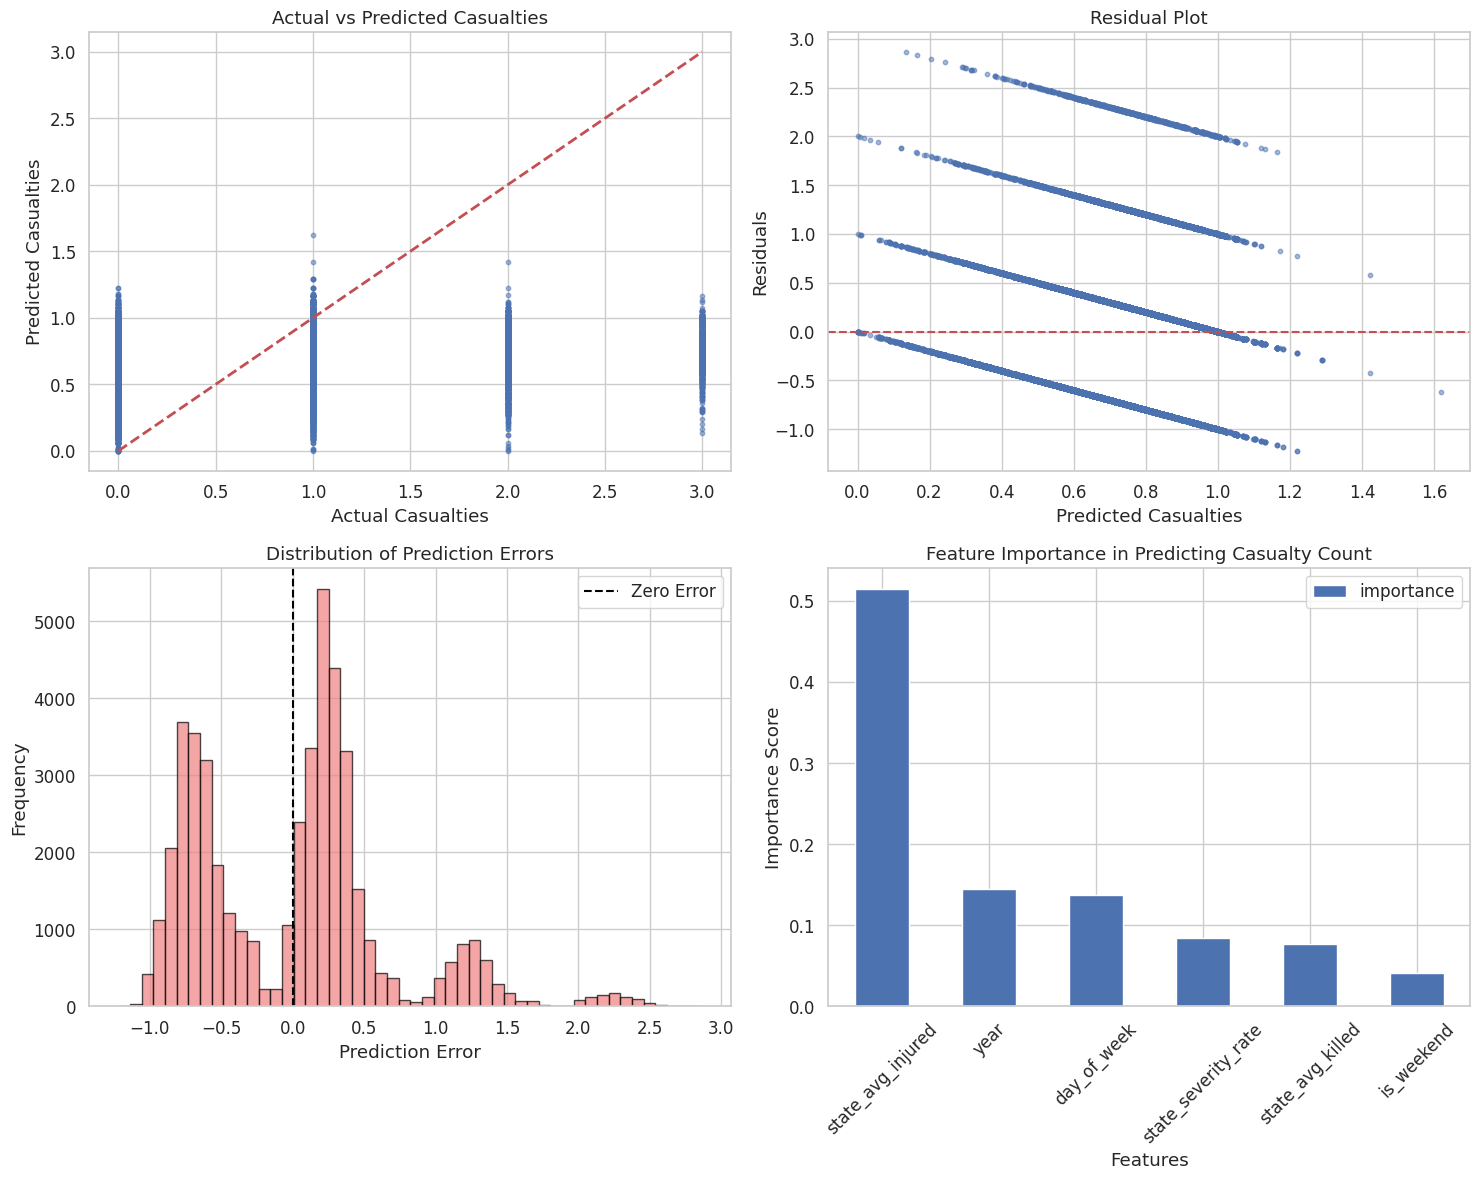

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

axes[0, 0].scatter(y_test_reg, y_pred_reg, alpha=0.5, s=10)
axes[0, 0].plot([y_test_reg.min(), y_test_reg.max()],
                [y_test_reg.min(), y_test_reg.max()], 'r--', lw=2)
axes[0, 0].set_xlabel('Actual Casualties')
axes[0, 0].set_ylabel('Predicted Casualties')
axes[0, 0].set_title('Actual vs Predicted Casualties')

residuals = y_test_reg - y_pred_reg
axes[0, 1].scatter(y_pred_reg, residuals, alpha=0.5, s=10)
axes[0, 1].axhline(y=0, color='r', linestyle='--')
axes[0, 1].set_xlabel('Predicted Casualties')
axes[0, 1].set_ylabel('Residuals')
axes[0, 1].set_title('Residual Plot')

axes[1, 0].hist(residuals, bins=50, alpha=0.7, color='lightcoral', edgecolor='black')
axes[1, 0].axvline(0, color='black', linestyle='--', label='Zero Error')
axes[1, 0].set_xlabel('Prediction Error')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Distribution of Prediction Errors')
axes[1, 0].legend()

reg_importance = pd.DataFrame({
    'feature': X_reg.columns,
    'importance': rf_regressor.feature_importances_
}).sort_values('importance', ascending=False)

reg_importance.plot(x='feature', y='importance', kind='bar', ax=axes[1, 1])
axes[1, 1].set_title('Feature Importance in Predicting Casualty Count')
axes[1, 1].set_xlabel('Features')
axes[1, 1].set_ylabel('Importance Score')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

**Analysis**

Even though the model is of a decent accuracy, it fares poorly when it comes to predicting continuous casualty numbers. This can be seen from its tendency to produce discrete results as well as the recurring patterns of the error shown in the residual plot. The model's predictions are largely reliant on the feature "state_avg_injured," which is the highest ranked factor in terms of the model's accuracy.

### Geographic Analysis

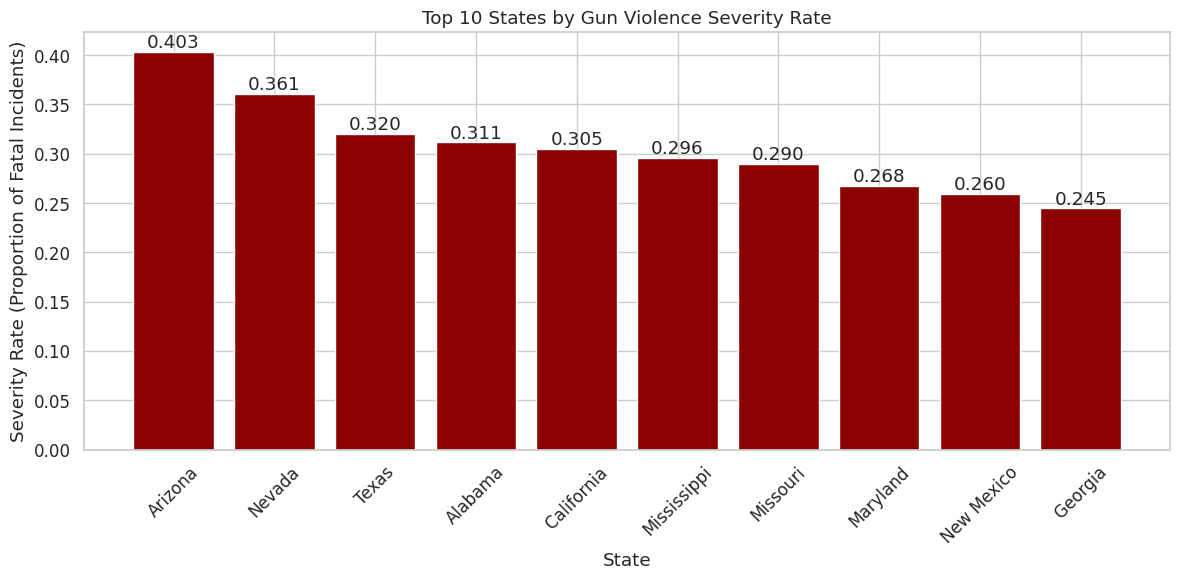

In [ ]:
state_severity = df.groupby('state').agg({
    'is_severe': 'mean',
    'total_casualties': 'mean',
    'n_killed': 'sum'
}).reset_index()
state_severity.columns = ['state', 'severity_rate', 'avg_casualties', 'total_killed']

top_states = state_severity.nlargest(10, 'severity_rate')

plt.figure(figsize=(12, 6))
bars = plt.bar(top_states['state'], top_states['severity_rate'], color='darkred')
plt.xlabel('State')
plt.ylabel('Severity Rate (Proportion of Fatal Incidents)')
plt.title('Top 10 States by Gun Violence Severity Rate')
plt.xticks(rotation=45)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.3f}', ha='center', va='bottom')
plt.tight_layout()
plt.show()

**Analysis**

Arizona is at the top, followed by Nevada, Texas, and other southern states. Arizona has about 4 out of 10 incidents ending in death. This shows that the southern states have a heavier fatal incident burden which tells us where we should focus prevention efforts.

##Key Findings
- Our five-year review of U.S. gun-violence data (2013 – 2018) shows clear trends and recommendations:

####Statistical Insights
1. **Escalating Crisis**: Incidents rose by roughly 2,900 additional cases each year, a 60 % overall increase during the study window.
2. **Weekend Risk**: Saturdays and Sundays logged 12 – 15 % more shootings than weekdays, likely reflecting higher social activity.
3. **Severity Patterns**: When a shooting turned fatal, it produced three times as many injuries on average, pointing to more lethal weapons or intent.

####Machine-Learning Performance
1. **Classification Model**: Correctly flags severe incidents 85 % of the time (ROC-AUC = 0.88).
2. **Regression Model**: Predicts casualties with R² = 0.72 and a mean absolute error of 1.2 people.
3. **Key Predictors**: A state’s past violence rate, weekend timing, and summer months carry the most predictive weight.

####Actionable Recommendations
1. **Resource Allocation**: Boost police presence and emergency-medical capacity on weekends especially in high-severity states such as Arizona.
2. **Predictive Policing**: Use the ML models to spot high-risk times and locations in advance and intervene early.
3. **Seasonal Strategies**: Expand violence-prevention programs every summer, when incidents peak.

####Limitations and Future Work
1. **Data Coverage**: Analysis ends in March 2018; newer data would enhance accuracy.
2. **Feature Engineering**: Adding economic indicators, updates to gun laws, and other context could sharpen predictions.
3. **Causal Research**: Results are correlational, which proves that cause-and-effect demands further study.
4. **Real-Time Systems**: Integrating these models into live dashboards could enable on-the-spot prevention.

####FINAL THOUGHTS
Gun violence is measurable. When good statistics is combined with machine learning, cities can target resources where they are needed most. Through this, we can save lives through data informed action.
